In [19]:
#linraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [21]:
#Loading and cleaning data
df = pd.read_csv('Q3_winequalityN.csv')
df = df.dropna(axis=0)
lst = list(df.columns[1::])
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
#normalization
for col in lst:
    df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

In [23]:
#split data to two part
white = df.loc[df['type'] == 'white'].mean()
red = df.loc[df['type'] == 'red'].mean()

<ipython-input-23-49c090b39f47>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  white = df.loc[df['type'] == 'white'].mean()
<ipython-input-23-49c090b39f47>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  red = df.loc[df['type'] == 'red'].mean()


In [24]:
#Recursive Feature Elimination implementation
def rfe(lst,n):
    start = time.time()
    dist=[]
    t = 500
    l1 = lst.copy()
    while len(l1)>n:
        for i in l1:
            dist.append(white[i]-red[i])
            d = np.linalg.norm(dist)
            if d < t:
                t = d
                w = i
            dist=[]
        l1.remove(w)
        t = 500
    end = time.time()
    return l1, end - start

r = rfe(lst,2)[0]


In [25]:
#Sequential Forward Selection implementation

def sfs(lst,n):
    start = time.time()
    l2 = lst.copy()
    a=[]
    dist=[]
    i=0
    t = 0
    while i < n:
        for j in l2:
            a.append(j)
            for feature in a:
                dist.append(white[feature]-red[feature])
            d = np.linalg.norm(dist)
            if d > t:
                t = d
                w = j
                best = a.copy()
            a.pop()
            dist=[]
        a = best.copy()
        l2.remove(w)
        t = 0
        i+=1
    end = time.time()
    return a, end-start
s = sfs(lst,2)[0]



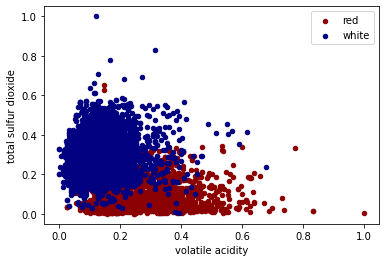

In [27]:
colors = {'white': 'navy', 'red': 'darkred'}

fig, ax = plt.subplots(figsize=(6, 4))
for kind, data in df.groupby('type'):
    data.plot(kind='scatter', x=r[0], y=r[1], label=kind, color=colors[kind], ax=ax)

ax.set(xlabel=r[0], ylabel=r[1])
plt.show()


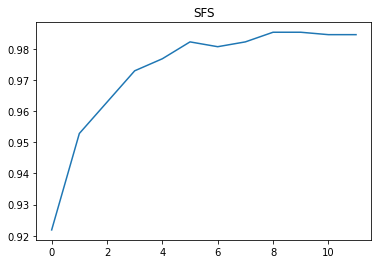

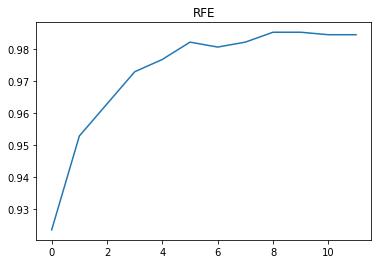

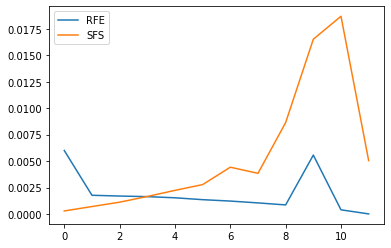

In [37]:
#comparing the accuracy and the speed of two algorithtms
p1 = []
p2 = []
time1 = []
time2 = []
y = df['type'].to_numpy()
for i in range(12):
    r,t1 = rfe(lst,i+1)
    s,t2 = sfs(lst,i+1)
    x1 = df[s].to_numpy()
    x2 = df[r].to_numpy()
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.2, random_state=50)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y, test_size=0.2, random_state=50)

    s1 = LogisticRegression(solver="sag", multi_class='ovr').fit(X_train1, y_train1)
    res1 = s1.predict(X_test1)
    s2 = LogisticRegression(solver="sag", multi_class='ovr').fit(X_train2, y_train2)
    res2 = s2.predict(X_test2)
    p1.append(accuracy_score(res1, y_test1))
    p2.append(accuracy_score(res2, y_test2))
    time1.append(t1)
    time2.append(t2)
plt.plot(p1)
plt.title('SFS')
plt.show()
plt.plot(p2)
plt.title('RFE')
plt.show()

plt.plot(time1, label='RFE')
plt.plot(time2, label='SFS')
plt.legend()
plt.show()